# **Simple selections**

It's time to begin writing your own queries! In this first coding exercise, you will use `SELECT` statements to retrieve columns from a database table. You'll be working with the eurovision table, which contains data relating to individual country performance at the Eurovision Song Contest from 1998 to 2012.

After selecting columns, you'll also practice renaming columns, and limiting the number of rows returned.

* `SELECT` the `country` column `FROM` the `eurovision` table.



```
SELECT country FROM eurovision
```
* Amend your query to return the `points` column instead of the country column.

```
SELECT   points FROM   eurovision;
```

* Use `TOP` to change the existing query so that only the first `50` rows are returned.


```
SELECT TOP(50) points FROM eurovision;
```

* Return a list of unique countries using `DISTINCT`. Give the results an alias of `unique_country`.


```
SELECT DISTINCT country as unique_country FROM eurovision
```








In [ ]:
import pandas as pd
df = pd.read_csv("eurovis.csv", usecols=["Country"]).rename(columns={"Country":"unique_country"})
df.shape[0]

648

In [ ]:
df = pd.read_csv("eurovis.csv", usecols=["Country"])
df.drop_duplicates(inplace=True)
df

,Country
0,Lithuania
1,Israel
2,France
3,Sweden
4,Croatia
5,Portugal
6,Iceland
7,Greece
8,Armenia
9,Russia


* `SELECT` the `country` and `event_year` columns from the eurovision table.



```
SELECT country, event_year
FROM eurovision
```



In [ ]:
import pandas as pd
pd.read_csv("eurovis.csv")[["Country", "EventYear"]].head()


,Country,EventYear
0,Lithuania,2009
1,Israel,2009
2,France,2009
3,Sweden,2009
4,Croatia,2009


* Return only half the rows using '`TOP`', using the same shortcut as before to return all columns.



```
SELECT TOP(50) PERCENT *
FROM eurovision;
```



In [ ]:
import pandas as pd
df = pd.read_csv("eurovis.csv")
df.head(int(df.shape[0]*0.5))

,ID,EventYear,Country,Gender,GroupType,Place,Points,HostCountry,HostRegion,IsFinal,SFNumber,SongInEnglish
0,1,2009,Lithuania,Male,Solo,23,23,Away,Home,1,NaN,1
1,2,2009,Israel,Female,Group,16,53,Away,Away,1,NaN,1
2,3,2009,France,Female,Solo,8,107,Away,Away,1,NaN,0
3,4,2009,Sweden,Female,Solo,21,33,Away,Away,1,NaN,1
4,5,2009,Croatia,Both,Group,18,45,Away,Away,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,2012,Cyprus,NaN,NaN,16,65,Away,Home,1,NaN,1
320,321,2012,Denmark,NaN,NaN,23,21,Away,Away,1,NaN,1
321,322,2012,Estonia,NaN,NaN,6,120,Away,Away,1,NaN,0
322,323,2012,France,NaN,NaN,22,21,Away,Away,1,NaN,1


# **Order and Filtering**

* เมื่อเขียน query ไปแล้ว มันจะให้ค่าเรามาโดยที่ไม่ได้สนใจการเรียงลำดับ
* นั่นคือ ในการเขียน query แต่ละครั้ง ค่าข้อมูลที่แสดงออกมาอาจจะไม่เหมือนกันก็ได้

## **Order by**

In this exercise, you'll practice the use of `ORDER BY` using the `grid` dataset. It contains a subset of wider publicly available information on US power outages.

Some of the main columns include:

* `description`: The reason/ cause of the outage.
* `nerc_region`: The North American Electricity Reliability Corporation was formed to ensure the reliability of the grid and comprises several regional entities.
* `demand_loss_mw`: How much energy was not transmitted/consumed during the outage.

======================================================



In [2]:
from pathlib import Path
import sqlite3
import pandas as pd

Path('data.db').touch()
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE grid (grid_id int, description text, event_year int, event_date text, restore_date text, nerc_region text, demand_loss_mw float, affected_customers float)''')
# load the data into a Pandas DataFrame
grid = pd.read_csv('grid.csv')
# write the data to a sqlite table
grid.to_sql('grid', conn, if_exists='append', index = False)

c.execute('''CREATE TABLE songlist (songlistID int, song text, artist text, release_year int, combined text)''')
song = pd.read_csv('songlist.csv') # load to DataFrame
song.to_sql('songlist', conn, if_exists='append', index = False)



In [3]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  This is separate from the ipykernel package so we can avoid doing imports until


['grid', 'songlist']

*  Select `description` and `event_date` from `grid`. Your query should return the first `5` rows, ordered by `event_date`.



```
SELECT TOP(5) description, event_date 
FROM grid 
ORDER BY event_date
```

* `sqlite` does not support the `TOP` keyword.



In [15]:
pd.read_sql_query('''SELECT description, event_date
                     FROM grid
                     ORDER BY event_date
                     LIMIT 5; ''', con=engine)

,description,event_date
0,Electrical Fault at Generator,2011-01-11
1,Winter Storm,2011-01-12
2,Firm System Load Shed,2011-01-13
3,Vandalism,2011-01-18
4,Vandalism,2011-01-23


* Modify your code based on 
  * Select the top 20 rows from `description`, `nerc_region` and `event_date`
  * Order by `nerc_region`, `affected_customers` & `event_date`
  * `event_date` should be in descending order

  

```
SELECT TOP (20) description, nerc_region, event_date
FROM grid 
ORDER BY nerc_region, affected_customers, event_date DESC
```



In [16]:
pd.read_sql_query('''SELECT description, nerc_region, event_date
                     FROM grid
                     ORDER BY nerc_region, affected_customers, event_date DESC
                     LIMIT 5; ''', con=engine)

,description,nerc_region,event_date
0,Suspected Physical Attack,ERCOT,2014-06-12
1,Fuel Supply Emergency Coal,ERCOT,2014-06-06
2,Physical Attack Vandalism,ERCOT,2014-06-03
3,Suspected Physical Attack,FRCC,2013-03-18
4,Load Shed of 100+ MW Under Emergency Operation...,FRCC,2013-06-17


# **WHERE**

You won't usually want to retrieve every row in your database. You'll have specific information you need in order to answer questions from your boss or colleagues.

The `WHERE` clause is essential for selecting, updating (and deleting!) data from your tables. You'll continue working with the `grid` dataset for this exercise.

* Select the `description` and `event_year` columns.
* Return rows `WHERE` the description is `'Vandalism'`.

In [17]:
pd.read_sql_query('''SELECT description, event_year
                     FROM grid
                     WHERE description = 'Vandalism'
                     LIMIT 5; ''', con=engine)

,description,event_year
0,Vandalism,2014
1,Vandalism,2013
2,Vandalism,2013
3,Vandalism,2013
4,Vandalism,2013


# **WHERE again**

When filtering strings, you need to wrap your value in <ins>'single quotes'</ins>, as you did in the previous exercise. You don't need to do this for numeric values, but you DO <ins>need to use single quotes for **date** columns</ins>.

In this course, dates are always represented in the `YYYY-MM-DD` format (Year-Month-Day), which is the default in Microsoft SQL Server.

* Select the `nerc_region` and `demand_loss_mw` columns, limiting the results to those where `affected_customers` is greater than or equal to 500000 (500,000).



```
SELECT nerc_region, demand_loss_mw
FROM grid 
WHERE affected_customers >= 500000
```



In [19]:
pd.read_sql_query('''SELECT nerc_region, demand_loss_mw
                     FROM grid
                     WHERE affected_customers >= 500000
                     LIMIT 5; ''', con=engine)

,nerc_region,demand_loss_mw
0,WECC,3900.0
1,WECC,3300.0
2,WECC,9750.0
3,RFC,NaN
4,SERC,4545.0


* Update your code to select `description` and `affected_customers`, returning records where the `event_date` was the 22nd December, 2013.



```
SELECT description, affected_customers
FROM grid 
WHERE event_date = '2013-12-22'
```



In [20]:
pd.read_sql_query('''SELECT description, affected_customers
                     FROM grid
                     WHERE event_date = '2013-12-22'
                     LIMIT 5; ''', con=engine)

,description,affected_customers
0,Severe Weather IceSnow,59000.0
1,Severe Weather IceSnow,50000.0
2,Severe Weather IceSnow,140735.0


* Select `description`, `affected_customers` and `event date`.  Limit the results to those where the `affected_customers` is `BETWEEN` `50000` and `150000`, and order in descending order of `event_date`.


```
SELECT description, affected_customers, event_date
FROM grid
WHERE affected_customers BETWEEN 50000 AND 150000
ORDER BY event_date DESC
```



In [22]:
pd.read_sql_query('''SELECT description, affected_customers, event_date
                     FROM grid
                     WHERE affected_customers BETWEEN 50000 AND 150000
                     ORDER BY event_date DESC
                     LIMIT 5; ''', con=engine)

,description,affected_customers,event_date
0,Severe Weather Thunderstorms,127000.0,2014-06-30
1,Severe Weather Thunderstorms,120000.0,2014-06-30
2,Severe Weather Thunderstorms,138802.0,2014-06-18
3,Severe Weather Thunderstorms,55951.0,2014-06-15
4,Severe Weather Thunderstorms,66383.0,2014-06-10


# **Working with `NULL` values**

A `NULL` value could mean `'zero'` - if something doesn't happen, it can't be logged in a table. However, `NULL` can also mean `'unknown'` or `'missing'`. So consider if it is appropriate to replace them in your results. `NULL` values provide feedback on data quality. If you have `NULL` values, and you didn't expect to have any, then you have an issue with either how data is captured or how it's entered in the database.

In this exercise, you'll practice filtering for `NULL` values, excluding them from results, and replacing them with alternative values.

* Use a shortcut to select all columns from `grid`. Then filter the results to only include rows where `demand_loss_mw` is unknown or missing.

```
SELECT *
FROM grid 
WHERE demand_loss_mw IS NULL
```



In [23]:
pd.read_sql_query('''SELECT *
                     FROM grid
                     WHERE demand_loss_mw IS NULL
                     LIMIT 5; ''', con=engine)

,grid_id,description,event_year,event_date,restore_date,nerc_region,demand_loss_mw,affected_customers
0,1,Severe Weather Thunderstorms,2014,2014-06-30,2014-07-02,RFC,None,420000.0
1,2,Severe Weather Thunderstorms,2014,2014-06-30,2014-07-01,RFC,None,127000.0
2,4,Fuel Supply Emergency Coal,2014,2014-06-27,None,MRO,None,NaN
3,5,Physical Attack Vandalism,2014,2014-06-24,2014-06-24,SERC,None,NaN
4,6,Physical Attack Vandalism,2014,2014-06-19,2014-06-19,SERC,None,NaN


* Adapt your code to return rows where `demand_loss_mw` is not unknown or missing.



```
SELECT *
FROM grid
WHERE demand_loss_mw IS NOT NULL
```



In [24]:
pd.read_sql_query('''SELECT *
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL
                     LIMIT 5; ''', con=engine)

,grid_id,description,event_year,event_date,restore_date,nerc_region,demand_loss_mw,affected_customers
0,3,Severe Weather Thunderstorms,2014,2014-06-30,2014-07-01,MRO,424.0,120000.0
1,15,Severe Weather Thunderstorms,2014,2014-06-07,2014-06-08,SERC,217.0,65000.0
2,17,Severe Weather Thunderstorms,2014,2014-06-05,2014-06-07,SERC,494.0,38500.0
3,19,Electrical System Islanding,2014,2014-06-03,2014-06-03,WECC,338.0,NaN
4,25,Public Appeal to Reduce Electricity Usage Wil...,2014,2014-05-16,2014-05-16,WECC,3900.0,1400000.0


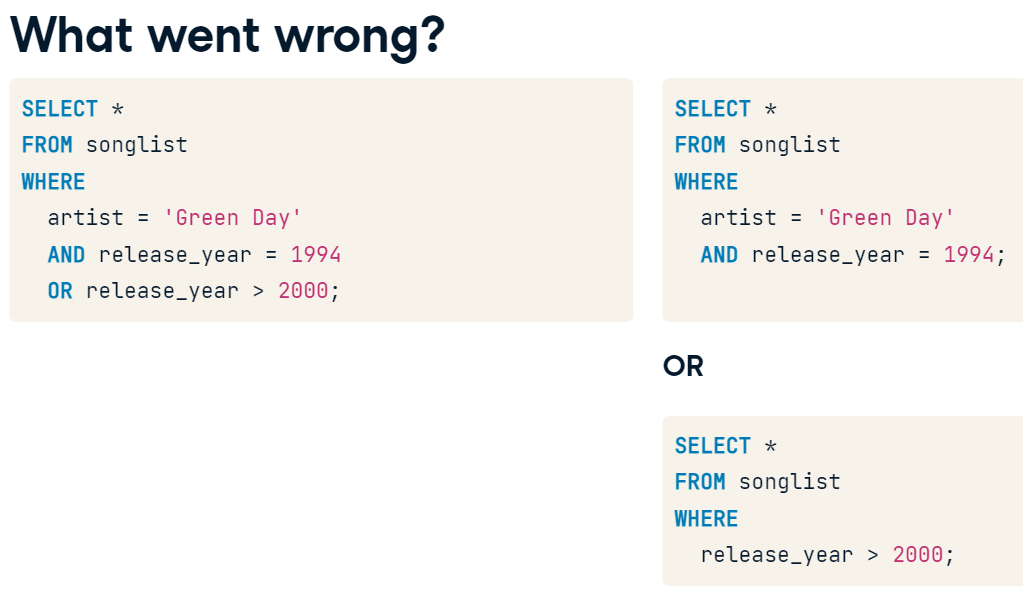

ต้องใช้ เครื่องหมาย วงเล็บ ในการเขียน query นี้

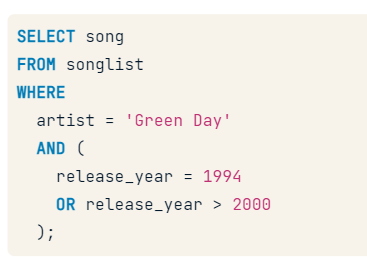



### **Exploring classic rock songs**

You'll use the `songlist` table, which contains songs featured on the playlists of 25 classic rock radio stations.

First, let's get familiar with the data.

In [7]:
from pathlib import Path
import sqlite3
import pandas as pd
import numpy as np

Path('data.db').touch()
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE grid (grid_id int, description text, event_year int, event_date text, restore_date text, nerc_region text, demand_loss_mw float, affected_customers float)''')
# load the data into a Pandas DataFrame
grid = pd.read_csv('grid.csv')
# write the data to a sqlite table
grid.to_sql('grid', conn, if_exists='append', index = False)

c.execute('''CREATE TABLE songlist (songlistID int, song text, artist text, release_year int, combined text)''')
song = pd.read_csv('songlist.csv') # load to DataFrame
song.to_sql('songlist', conn, if_exists='append', index = False)

from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.db")

* Retrieve the `song`, `artist`, and `release_year` columns from the `songlist` table.

```
SELECT song, artist, release_year
FROM songlist
```



In [8]:
pd.read_sql_query('''SELECT song, artist, release_year
                     FROM songlist
                     LIMIT 5; ''', con=engine)

,song,artist,release_year
0,I Cant Fight This Feeling,REO Speedwagon,1984.0
1,Keep On Loving You,REO Speedwagon,1980.0
2,Keep Pushin 1977,REO Speedwagon,NaN
3,Like You Do,REO Speedwagon,NaN
4,Ridin the Storm Out,REO Speedwagon,NaN


* Make sure there are no `NULL` values in the `release_year` column.

```
SELECT song, artist, release_year
FROM songlist
WHERE release_year IS NOT NULL
```



In [9]:
pd.read_sql_query('''SELECT song, artist, release_year
                     FROM songlist
                     WHERE release_year IS NOT NULL
                     LIMIT 5; ''', con=engine)

,song,artist,release_year
0,I Cant Fight This Feeling,REO Speedwagon,1984
1,Keep On Loving You,REO Speedwagon,1980
2,Take It on the Run,REO Speedwagon,1981
3,Jessies Girl,Rick Springfield,1981
4,Back Off Boogaloo,Ringo Starr,1972


* Order the results by `artist` and `release_year`



```
SELECT song, artist, release_year
FROM songlist
WHERE release_year IS NOT NULL
ORDER BY artist, release_year
```



In [10]:
pd.read_sql_query('''SELECT song, artist, release_year
                     FROM songlist
                     WHERE release_year IS NOT NULL
                     ORDER BY artist, release_year
                     LIMIT 5; ''', con=engine)

,song,artist,release_year
0,Rockin Into the Night,.38 Special,1980
1,Hold On Loosely,.38 Special,1981
2,Caught Up in You,.38 Special,1982
3,Art For Arts Sake,10cc,1975
4,Kryptonite,3 Doors Down,2000


# **Exploring classic rock songs - `AND/OR`**

Having familiarized yourself with the `songlist` table, you'll now extend your `WHERE` clause from the previous exercise.

* Extend the `WHERE` clause so that the results are those with a `release_year` greater than or equal to `1980 `and less than or equal to `1990`.



```
SELECT song, artist, release_year
FROM songlist 
WHERE release_year >= 1980
AND release_year <= 1990
ORDER BY artist, release_year;
```



In [11]:
pd.read_sql_query('''SELECT song, artist, release_year
                     FROM songlist
                     WHERE release_year IS NOT NULL
                     AND release_year BETWEEN 1980 AND 1990
                     ORDER BY artist, release_year
                     LIMIT 5; ''', con=engine)

,song,artist,release_year
0,Rockin Into the Night,.38 Special,1980
1,Hold On Loosely,.38 Special,1981
2,Caught Up in You,.38 Special,1982
3,Back In Black,AC/DC,1980
4,Have a Drink On Me,AC/DC,1980


* Update your query to use an `OR` instead of an `AND`

In [12]:
pd.read_sql_query('''SELECT song, artist, release_year
                     FROM songlist
                     WHERE release_year IS NOT NULL
                     AND (release_year >= 1980 OR release_year <= 1990)
                     ORDER BY artist, release_year
                     LIMIT 5; ''', con=engine)

,song,artist,release_year
0,Rockin Into the Night,.38 Special,1980
1,Hold On Loosely,.38 Special,1981
2,Caught Up in You,.38 Special,1982
3,Art For Arts Sake,10cc,1975
4,Kryptonite,3 Doors Down,2000


# **Using parentheses in your queries**

You can use parentheses to make the intention of your code clearer. This becomes very important when using `AND` and `OR` clauses, to ensure your queries return the exact subsets you need.

* Select all `artist`s beginning with `B` who released tracks in `1986`, but also retrieve any records where the `release_year` is greater than `1990`.


```
SELECT artist, release_year, song 
FROM songlist 
WHERE (artist LIKE 'B%' AND release_year = 1986) 
OR  release_year > 1990
ORDER BY release_year, artist, song;
```



In [14]:
pd.read_sql_query('''SELECT artist, release_year, song
                     FROM songlist
                     WHERE release_year IS NOT NULL
                     AND (artist LIKE 'B%' AND release_year = 1986)
                     OR release_year > 1990
                     ORDER BY release_year, artist, song
                     LIMIT 10; ''', con=engine)

,artist,release_year,song
0,Beastie Boys,1986,(You Gotta) Fight for Your Right (To Party)
1,Beastie Boys,1986,No Sleep Till Brooklyn
2,Bon Jovi,1986,Livin On A Prayer
3,Bon Jovi,1986,Wanted Dead or Alive
4,Bon Jovi,1986,You Give Love A Bad Name
5,Boston,1986,Amanda
6,Bruce Hornsby & The Range,1986,The Way It Is
7,Extreme,1991,More Than Words
8,Guns N' Roses,1991,Civil War
9,Guns N' Roses,1991,November Rain


# **Summing**

Summing and counting are key ways of aggregating data, regardless of whether you are using a database, manipulating a spreadsheet, or using a programming language such as Python or R. Let's see how to do it in T-SQL using the `grid` table from Chapter 1.

You'll start by obtaining overall sums, focusing specifically on the `'MRO'` region.

In [1]:
from pathlib import Path
import sqlite3
import pandas as pd

Path('data.db').touch()
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE grid (grid_id int, description text, event_year int, event_date text, restore_date text, nerc_region text, demand_loss_mw float, affected_customers float)''')
# load the data into a Pandas DataFrame
grid = pd.read_csv('grid.csv')
# write the data to a sqlite table
grid.to_sql('grid', conn, if_exists='append', index = False)

c.execute('''CREATE TABLE songlist (songlistID int, song text, artist text, release_year int, combined text)''')
song = pd.read_csv('songlist.csv') # load to DataFrame
song.to_sql('songlist', conn, if_exists='append', index = False)

from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['grid', 'songlist']

* Obtain a grand total of the `demand_loss_mw` column by using the `SUM` function, and alias the result as `MRO_demand_loss`.
* Only retrieve rows `WHERE` `demand_loss_mw` is not `NULL` and `nerc_region` is `'MRO'`.

In [3]:
pd.read_sql_query('''SELECT SUM(demand_loss_mw) AS MRO_demand_loss
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL
                     AND nerc_region = 'MRO'; ''', con=engine)

,MRO_demand_loss
0,916.0


# **Counting**

Having explored the `'MRO'` region, let's now explore the `'RFC'` region in more detail while learning how to use the `COUNT` aggregate function.

* Return the `COUNT` of the `grid_id` column, aliasing the result as `grid_total`.

In [4]:
pd.read_sql_query('''SELECT COUNT(grid_id) AS grid_total
                     FROM grid; ''', con=engine)

,grid_total
0,807


* Make the count more meaningful by restricting it to records where the `nerc_region` is `'RFC'`. Name the result `RFC_count`.

In [5]:
pd.read_sql_query('''SELECT COUNT(grid_id) AS RFC_count
                     FROM grid
                     WHERE nerc_region = 'RFC'; ''', con=engine)

,RFC_count
0,247


# **MIN, MAX and AVG**

Along with summing and counting, you'll frequently need to find the minimum, maximum, and average of column values. Thankfully, T-SQL has functions you can use to make the task easier!

* Find the minimum value from the `affected_customers` column, but only for rows where `demand_loss_mw` has a value. Name the result `min_affected_customers`.

In [15]:
pd.read_sql_query('''SELECT MIN(affected_customers) AS min_affected_customers
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL; ''', con=engine)

,min_affected_customers
0,0.0


* Amend the query to return the maximum value from the same column, this time aliasing as `max_affected_customers`.

In [16]:
pd.read_sql_query('''SELECT MAX(affected_customers) AS max_affected_customers
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL; ''', con=engine)

,max_affected_customers
0,4645572.0


* Return the average value from the `affected_customers` column, this time aliasing as `avg_affected_customers`.

In [17]:
pd.read_sql_query('''SELECT AVG(affected_customers) AS avg_affected_customers
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL; ''', con=engine)

,avg_affected_customers
0,128240.62701


# **`LEN`'gth of a string**

* Retrieve the length of the `description` column, returning the results as `description_length`.
  * IN SQLite, `LENGTH` is used instead of `LEN`

In [20]:
pd.read_sql_query('''SELECT LENGTH(description) AS description_length
                     FROM grid
                     LIMIT 5; ''', con=engine)

,description_length
0,29
1,29
2,29
3,27
4,26


# **Left and right**
We can retrieve portions of a string from either the start of the string, using `LEFT`, or working back from the end of the string, using `RIGHT`.

* Retrieve the first `25` characters from the `description` column in the `grid` table. Name the `results first_25_left`.



```
SELECT 
LEFT(description, 25) AS first_25_left
FROM grid
```
* `LEFT` is unavailable in SQLite so `SUBSTR(col, start, length)` must be used instead.




In [27]:
pd.read_sql_query('''SELECT SUBSTR(description, 1, 25) AS first_25_left
                     FROM grid
                     LIMIT 5; ''', con=engine)

,first_25_left
0,Severe Weather Thunderst
1,Severe Weather Thunderst
2,Severe Weather Thunderst
3,Fuel Supply Emergency Co
4,Physical Attack Vandalis


* Amend the query to retrieve the last 25 characters from the `description`. Name the results `last_25_right`.


```
SELECT 
RIGHT(description, 25) AS last_25_right
FROM grid;
```



In [30]:
pd.read_sql_query('''SELECT SUBSTR(description, -25) AS last_25_right
                     FROM grid
                     LIMIT 5; ''', con=engine)

,last_25_right
0,re Weather Thunderstorms
1,re Weather Thunderstorms
2,re Weather Thunderstorms
3,el Supply Emergency Coal
4,hysical Attack Vandalism


# **Stuck in the middle with you**

You might be fortunate, and find that the interesting parts of your strings are at either end. However, chances are, you'll want to retrieve characters from somewhere around the middle. Let's see how to use `RIGHT`, `LEN`, `CHARINDEX` AND `SUBSTRING` to extract the interior portion of a text string. The `description` column can contain multiple reasons for power outages in each row. We want to extract any additional causes of outage whenever Weather appears in the `description` column.

* Use `CHARINDEX` to find a specific character or pattern within a column. Edit the query to return the `CHARINDEX` of the string `'Weather'` whenever it appears within the description column.

```
SELECT description, CHARINDEX('Weather', description) 
FROM grid
WHERE description LIKE '%Weather%';
```

* In SQLite, the  function `INSTR(col, string)` must be used instead of `CHARINDEX`



In [38]:
pd.read_sql_query('''SELECT description, INSTR(description, 'Weather')
                     FROM grid
                     WHERE description LIKE '%Weather%'
                     LIMIT 5;''', con=engine)

,description,"INSTR(description, 'Weather')"
0,Severe Weather Thunderstorms,8
1,Severe Weather Thunderstorms,8
2,Severe Weather Thunderstorms,8
3,Severe Weather Thunderstorms,8
4,Severe Weather Thunderstorms,8


* We now know where `'Weather'` begins in the `description` column. But where does it end? We could manually count the number of characters, but, for longer strings, this is more work, especially when we can also find the length with `LEN`.

```
SELECT description, CHARINDEX('Weather', description AS start_of_string, LEN('Weather') AS length_of_string 
FROM grid
WHERE description LIKE '%Weather%'; 
```



In [39]:
pd.read_sql_query('''SELECT description, INSTR(description, 'Weather') AS start_of_string, LENGTH('Weather') AS length_of_string 
                     FROM grid
                     WHERE description LIKE '%Weather%'
                     LIMIT 5;''', con=engine)

,description,start_of_string,length_of_string
0,Severe Weather Thunderstorms,8,7
1,Severe Weather Thunderstorms,8,7
2,Severe Weather Thunderstorms,8,7
3,Severe Weather Thunderstorms,8,7
4,Severe Weather Thunderstorms,8,7


* Now we use `SUBSTRING` to return everything after `Weather` for the first ten rows. The start index here is `15`, because the `CHARINDEX` for each row is `8`, and the `LEN` of Weather is `7`.

```
SELECT description, 
       CHARINDEX('Weather', description) AS start_of_string, 
       LEN ('Weather') AS length_of_string, 
       SUBSTRING(description, 15, LEN(description)) AS additional_description 
FROM grid
WHERE description LIKE '%Weather%';
```



In [44]:
pd.read_sql_query('''SELECT description, INSTR(description, 'Weather') AS start_of_string, LENGTH('Weather') AS length_of_string, SUBSTR(description, 15, LENGTH(description)) AS additional_description
                     FROM grid
                     WHERE description LIKE '%Weather%'
                     LIMIT 20;''', con=engine)

,description,start_of_string,length_of_string,additional_description
0,Severe Weather Thunderstorms,8,7,Thunderstorms
1,Severe Weather Thunderstorms,8,7,Thunderstorms
2,Severe Weather Thunderstorms,8,7,Thunderstorms
3,Severe Weather Thunderstorms,8,7,Thunderstorms
4,Severe Weather Thunderstorms,8,7,Thunderstorms
5,Severe Weather Thunderstorms,8,7,Thunderstorms
6,Severe Weather Thunderstorms,8,7,Thunderstorms
7,Severe Weather Thunderstorms,8,7,Thunderstorms
8,Severe Weather Thunderstorms,8,7,Thunderstorms
9,Severe Weather Heavy Winds,8,7,Heavy Winds


# **GROUP BY**

In an earlier exercise, you wrote a separate `WHERE` query to determine the amount of demand lost for a specific region. We wouldn't want to have to write individual queries for every region. Fortunately,you don't have to write individual queries for every region. With `GROUP BY`, you can obtain a sum of all the unique values for your chosen column, all at once.

You'll return to the `grid` table here and calculate the total lost demand for all regions.

* Select `nerc_region` and the sum of `demand_loss_mw` for each region.
* Exclude values where `demand_loss_mw` is `NULL`.
* Group the results by `nerc_region`.
* Arrange in descending order of `demand_loss`

In [45]:
pd.read_sql_query('''SELECT nerc_region, SUM(demand_loss_mw) AS demand_loss
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL
                     GROUP BY nerc_region
                     ORDER BY demand_loss DESC;''', con=engine)

,nerc_region,demand_loss
0,WECC,72019.0
1,SERC,51737.0
2,RFC,31037.0
3,TRE,8202.0
4,PR,6880.0
5,NPCC,4328.0
6,SPP,1936.0
7,MRO,916.0
8,FRCC,833.0


# **Having**

`WHERE` is used to filter rows before any grouping occurs. Once you have performed a grouping operation, you may want to further restrict the number of rows returned. This is a job for `HAVING`. In this exercise, you will modify an existing query to use `HAVING`, so that only those results with a sum of over `10000` are returned.

* Use `HAVING` clause so that only results with a total `demand_loss_mw` of greater than `10000` are returned.

In [47]:
pd.read_sql_query('''SELECT nerc_region, SUM(demand_loss_mw) AS demand_loss
                     FROM grid
                     WHERE demand_loss_mw IS NOT NULL
                     GROUP BY nerc_region
                     HAVING SUM(demand_loss_mw) > 10000
                     ORDER BY demand_loss DESC;''', con=engine)

,nerc_region,demand_loss
0,WECC,72019.0
1,SERC,51737.0
2,RFC,31037.0


* `WHERE` is applied <ins>before</ins> `GROUP BY` and filters on rows. 
* `HAVING` is applied <ins>after</ins> `GROUP BY`, and filters on the groups or aggregates you created within the query.
* `ORDER BY` comes last

# **Grouping together**
Combine `GROUP BY` with aggregate functions such as `MIN`.


In [2]:
from pathlib import Path
import sqlite3
import pandas as pd

Path('data.db').touch()
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE grid (grid_id int, description text, event_year int, event_date text, restore_date text, nerc_region text, demand_loss_mw float, affected_customers float)''')
# load the data into a Pandas DataFrame
grid = pd.read_csv('grid.csv')
# write the data to a sqlite table
grid.to_sql('grid', conn, if_exists='append', index = False)

c.execute('''CREATE TABLE songlist (songlistID int, song text, artist text, release_year int, combined text)''')
song = pd.read_csv('songlist.csv') # load to DataFrame
song.to_sql('songlist', conn, if_exists='append', index = False)

c.execute('''CREATE TABLE eurovision (euro_id int, event_year int, country text, gender text, group_type text, place int, points int, host_country text, host_region text, is_final int, sf_number float, song_in_english int)''')
euro = pd.read_csv('eurovis.csv') # load to DataFrame
euro.columns = ["euro_id", "event_year", "country", "gender", "group_type", "place", "points", "host_country", "host_region", "is_final", "sf_number", "song_in_english"]
euro.to_sql('eurovision', conn, if_exists='append', index = False)

from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.db")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)


['eurovision', 'grid', 'songlist']

* Use `MIN` and `MAX` to retrieve the minimum and maximum values for the `place` and `points` columns respectively.

In [3]:
pd.read_sql_query('''SELECT MIN(place) AS min_place, 
                     MAX(place) AS max_place, 
                     MIN(points) AS min_points, 
                     MAX(points) AS max_points 
                     FROM eurovision;''', con=engine)

,min_place,max_place,min_points,max_points
0,1,28,0,387


* Let's obtain more insight from our results by adding a `GROUP BY` clause. Group the results by `country`.

In [4]:
pd.read_sql_query('''SELECT MIN(place) AS min_place, 
                     MAX(place) AS max_place, 
                     MIN(points) AS min_points, 
                     MAX(points) AS max_points 
                     FROM eurovision
                     GROUP BY country;''', con=engine)

,min_place,max_place,min_points,max_points
0,2,17,43,167
1,12,23,8,80
2,2,12,54,198
3,6,27,4,101
4,1,8,96,221
5,4,24,10,176
6,1,26,1,167
7,2,18,27,267
8,5,19,7,157
9,3,21,29,169


* The previous query results did not identify the `country`. Let's amend the query, returning the count of entries per `country` and the `country` column. Complete the aggregate section by finding the average `place` for each `country`.

In [7]:
pd.read_sql_query('''SELECT country, 
                            COUNT(country) AS country_count, 
                            AVG(place) AS average_place,
                            AVG(points) AS average_points, 
                            MIN(points) AS min_points,
                            MAX(points) AS max_points 
                     FROM eurovision
                     GROUP BY country;''', con=engine)

,country,country_count,average_place,average_points,min_points,max_points
0,Albania,14,10.714286,81.785714,43,167
1,Andorra,6,17.833333,26.166667,8,80
2,Armenia,10,6.800000,122.300000,54,198
3,Austria,10,16.000000,41.000000,4,101
4,Azerbaijan,9,3.777778,150.444444,96,221
5,Belarus,11,14.272727,56.090909,10,176
6,Belgium,15,13.933333,58.333333,1,167
7,Bosnia and Herzegovina,20,9.350000,98.200000,27,267
8,Bulgaria,9,12.333333,62.555556,7,157
9,Croatia,19,11.210526,68.315789,29,169


Our results are skewed by countries who only have one entry. Apply a filter so we only return rows where the `country_count` is greater than `5`. Then arrange by `average_place` in ascending order, and `average_points` in descending order.

In [9]:
pd.read_sql_query('''SELECT country, 
                            COUNT(country) AS country_count, 
                            AVG(place) AS average_place,
                            AVG(points) AS average_points, 
                            MIN(points) AS min_points,
                            MAX(points) AS max_points 
                     FROM eurovision
                     GROUP BY country
                     HAVING country_count > 5
                     ORDER BY average_place, average_points DESC;''', con=engine)

,country,country_count,average_place,average_points,min_points,max_points
0,Azerbaijan,9,3.777778,150.444444,96,221
1,Serbia,10,6.300000,145.200000,60,298
2,Russia,18,6.777778,134.166667,37,266
3,Armenia,10,6.800000,122.300000,54,198
4,Greece,19,7.052632,131.842105,12,252
5,Ukraine,17,7.235294,130.000000,30,280
6,Turkey,21,7.571429,107.761905,21,197
7,Sweden,20,7.950000,120.600000,30,372
8,Georgia,9,8.555556,96.888889,36,136
9,Bosnia and Herzegovina,20,9.350000,98.200000,27,267


# **JOIN**

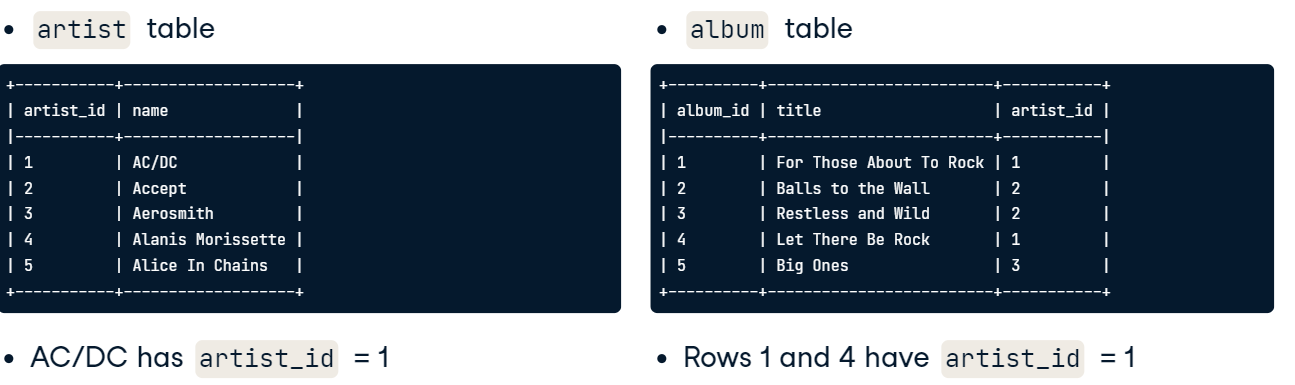

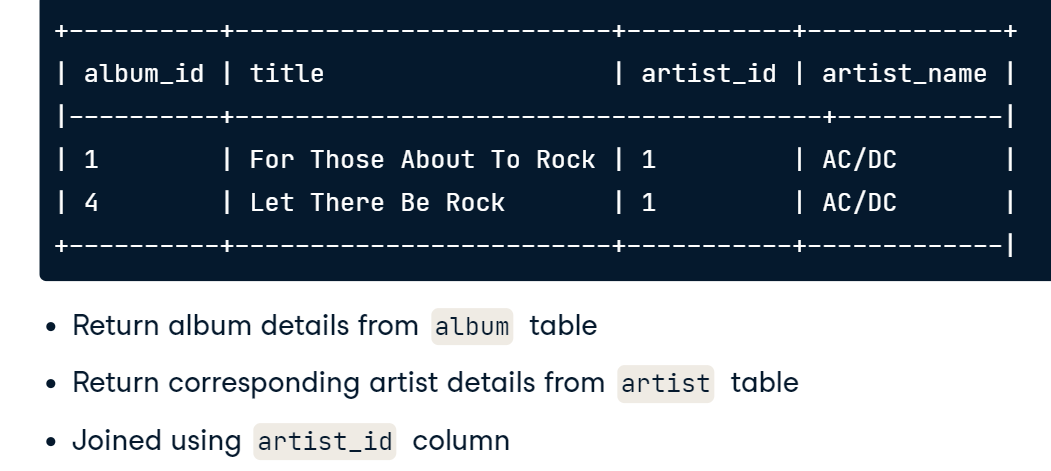

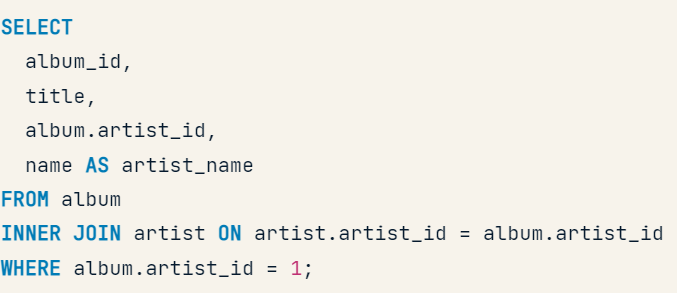

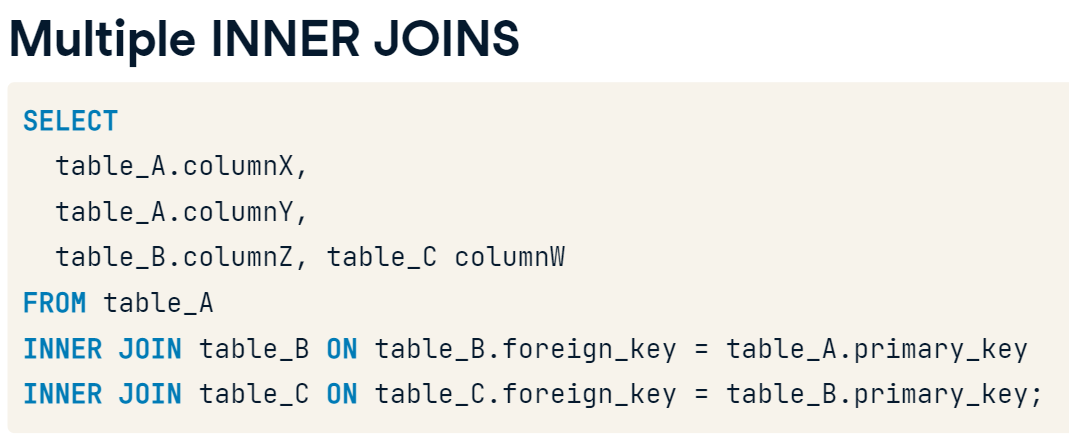

# **Inner Joins - a perfect match**

Let's use the `Chinook` database, which consists of tables related to an online store, to understand how inner joins work. The album table lists albums by multiple artists. The track table lists individual songs, each with a unique identifier, but also, an album_id column that links each track to an album.

Let's find the tracks that belong to each album.

In [2]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Chinook.sqlite")
engine.table_names()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  This is separate from the ipykernel package so we can avoid doing imports until


['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

* `SELECT`   `track_id`,  `name` `AS` `track_name`,  `title` `AS` `album_title`
* Perform an inner join between `album` and `track` using the `album_id` column.

```
SELECT track_id,
       name AS track_name,
       title AS album_title
FROM track
INNER JOIN album on track.album_id = album.album_id;
```



In [8]:
pd.read_sql_query('''SELECT TrackId AS track_id,
                            Name AS track_name,
                            Title AS album_title
                     FROM Track
                     INNER JOIN Album ON Track.AlbumId = Album.AlbumId;''', con=engine)

,track_id,track_name,album_title
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,2,Balls to the Wall,Balls to the Wall
2,3,Fast As a Shark,Restless and Wild
3,4,Restless and Wild,Restless and Wild
4,5,Princess of the Dawn,Restless and Wild
...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music


# **Inner Joins (II)**

Here, you'll continue to practice your INNER JOIN skills. We'll use the `album` table as last time, but will join it to a new table - `artist` - which consists of two columns: `artist_id` and `name`.

* Select the `album_id` and `title` columns from `album` (the main source table name).
* Select the `name` column from `artist` and alias it as `artist`.
Identify a common column between the `album `and `artist` tables and perform an inner join.



```
SELECT album_id,
       title,
       name AS artist
FROM   artist
INNER JOIN album on album.artist_id = artist.artist_id;
```



In [12]:
pd.read_sql_query('''SELECT AlbumId AS album_id,
                     Title AS title,
                     Name AS artist
                     FROM Artist
                     INNER JOIN Album ON Artist.ArtistId = Album.ArtistId
                     LIMIT 5;''', con=engine)

,album_id,title,artist
0,1,For Those About To Rock We Salute You,AC/DC
1,2,Balls to the Wall,Accept
2,3,Restless and Wild,Accept
3,4,Let There Be Rock,AC/DC
4,5,Big Ones,Aerosmith


# **Inner Join (III) - Join 3 tables**
We've seen how to join 2 tables together - `album` with `track`, and `album` with `artist`. In this exercise, you'll join all three tables to pull together a more complete result set. You'll continue using INNER JOIN, but you need to specify more than one.

Here, note that because both `track` and `artist` contain a `name` column, you need to qualify where you are selecting the columns by prefixing the column name with the relevant table name.

* Qualify the `name` column by specifying the correct table prefix in both cases.
* Complete both `INNER JOIN` clauses to join `album` with `track`, and `artist` with `album`.



```
SELECT track_id,
       track.name AS track_name,
       title as album_title,
       artist.name AS artist_name
FROM track
INNER JOIN album on track.album_id	 = album.album_id	
INNER JOIN artist on album.artist_id	 = artist.artist_id;
```



In [9]:
pd.read_sql_query('''SELECT TrackId AS track_id,
                            Track.Name AS track_name,
                            title as album_title,
                            Artist.name AS artist_name
                            FROM Track
                            INNER JOIN Album ON Track.AlbumId = Album.AlbumId
                            INNER JOIN Artist ON Album.ArtistId = Artist.ArtistId
                            LIMIT 5;''', con=engine)

,track_id,track_name,album_title,artist_name
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,2,Balls to the Wall,Balls to the Wall,Accept
2,3,Fast As a Shark,Restless and Wild,Accept
3,4,Restless and Wild,Restless and Wild,Accept
4,5,Princess of the Dawn,Restless and Wild,Accept


# **LEFT & RIGHT JOIN**

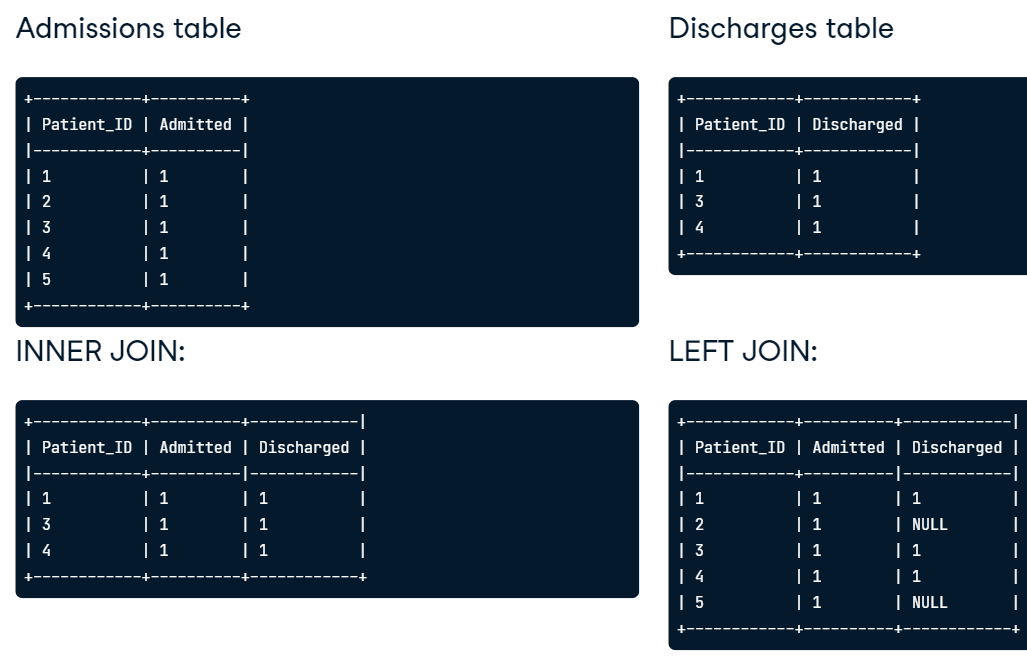

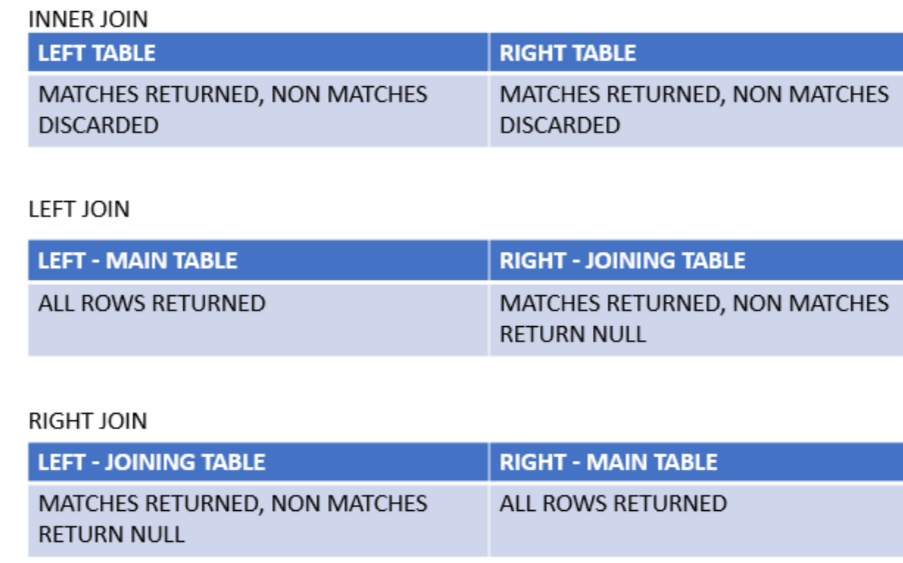

# **LEFT join**

An INNER JOIN shows you exact matches. What about when you want to compare all the values in one table with another, to see which rows match? That's when you can use a `LEFT JOIN`.

A `LEFT JOIN` will return ALL rows in the first table, and any matching rows in the right table. If there aren't any matches in the right table for a particular row, then a `NULL` is returned. This quickly lets you assess the gaps in your data, and how many you have.

* `SELECT invoiceline_id,  unit_price,   quantity,  billing_state`
* Complete the LEFT JOIN, returning all rows from the specified columns from `invoiceline` and any matches from `invoice`.

```
SELECT invoiceline_id,
       unit_price, 
       quantity,
       billing_state
FROM invoiceline
LEFT JOIN invoice ON invoiceline.invoice_id = invoice.invoice_id;
```

# **RIGHT JOIN**

Let's now try some RIGHT joins. A RIGHT join will return all rows from the right hand table, plus any matches from the left hand side table.

In addition to performing a RIGHT join, you'll also learn how to avoid problems when different tables have the same column names, by fully qualifying the column in your select statement. Remember, we do this by prefixing the column name with the table name.

For this exercise, we'll return to the Chinook database

* SELECT the fully qualified column names `album_id` from `album` and `name` from `artist`. Then, join the tables so that only matching rows are returned (non-matches should be discarded).


```
SELECT album.album_id,
       title,
       album.artist_id,
       artist.name as artist
FROM album
INNER JOIN artist ON album.artist_id = artist.artist_id
WHERE album.album_id IN (213,214)
```




In [11]:
pd.read_sql_query('''SELECT Album.AlbumId AS album_id,
                            Title AS title,
                            Album.ArtistId AS artist_id,
                            Artist.Name as artist
                     FROM Album
                     INNER JOIN Artist ON Album.ArtistId = Artist.ArtistId
                     WHERE Album.AlbumId IN (213,214);''', engine)

,album_id,title,artist_id,artist
0,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
1,214,The Doors,140,The Doors


* To complete the query, join the `album` table to the `track` table using the relevant fully qualified `album_id` column. The album table is on the left-hand side of the join, and the additional join should return all matches or NULLs.

```
SELECT album.album_id,
       title,
       album.artist_id,
       artist.name as artist
FROM album
INNER JOIN artist ON album.artist_id = artist.artist_id
LEFT JOIN track on album.album_id = track.album_id
WHERE album.album_id IN (213,214)
```



In [12]:
pd.read_sql_query('''SELECT Album.AlbumId AS album_id,
                            Title AS title,
                            Album.ArtistId AS artist_id,
                            Artist.Name as artist
                     FROM Album
                     INNER JOIN Artist ON Album.ArtistId = Artist.ArtistId
                     LEFT JOIN Track ON Album.AlbumId = Track.AlbumId
                     WHERE Album.AlbumId IN (213,214);''', engine)

,album_id,title,artist_id,artist
0,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
1,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
2,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
3,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
4,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
5,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
6,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
7,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
8,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult
9,213,"Pure Cult: The Best Of The Cult (For Rockers, ...",139,The Cult


Did you notice that the `LEFT JOIN` significantly increased the number of rows returned compared to the first query?

# **UNION and UNION ALL**

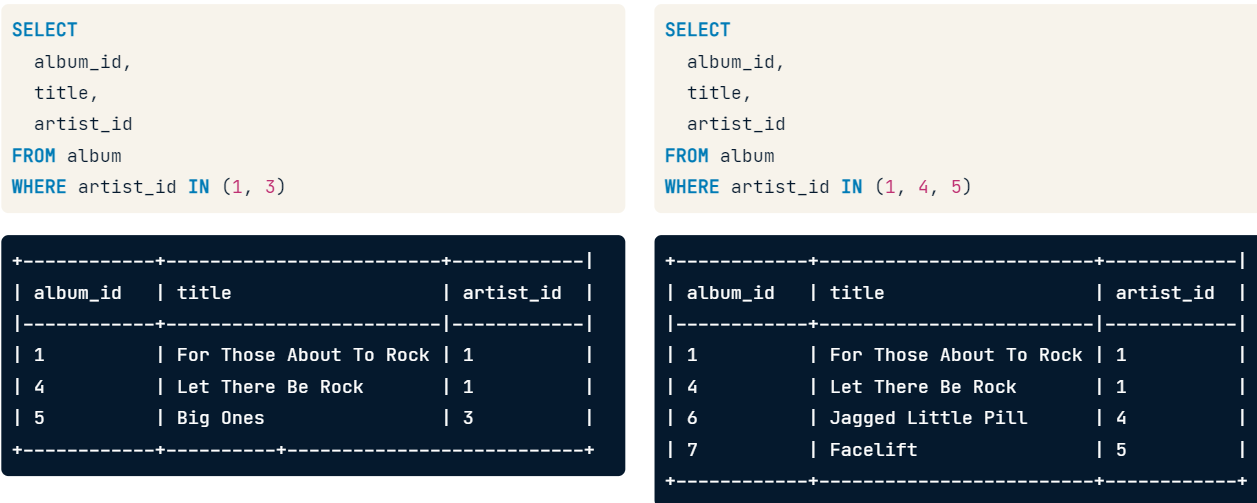

* UNION excludes duplicates

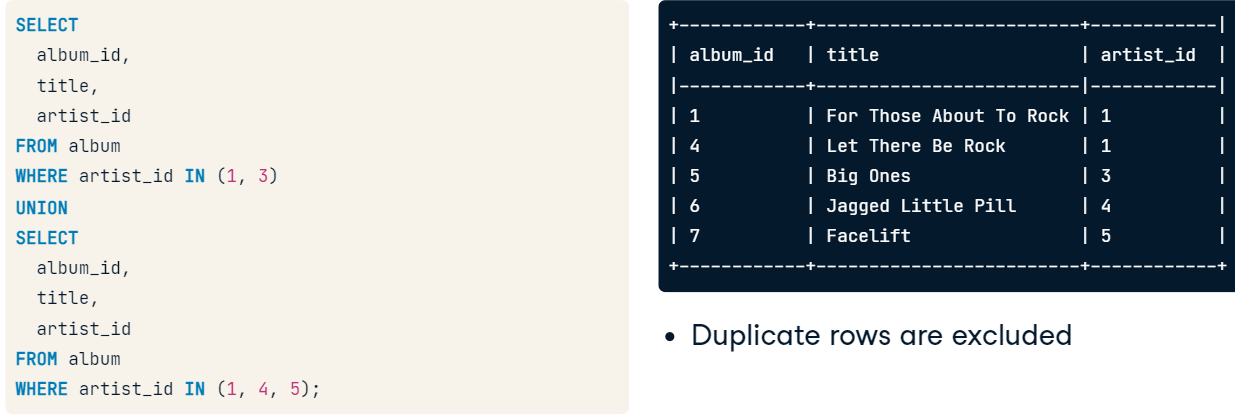

* UNION ALL returns duplicates

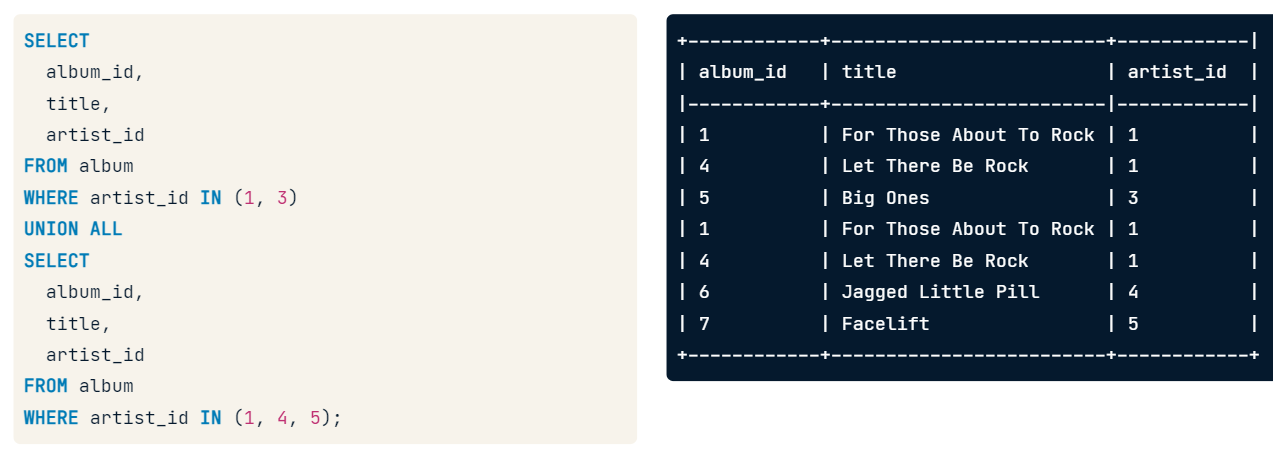



# **Join the UNION**

You can write 2 or more SELECT statements and combine the results using `UNION`. For example, you may have two different tables with similar column types. If you wanted to combine these into one set of results, you'd use `UNION`. You'll see how to do this using the `artist` and `album` tables. In this exercise, you'll `SELECT` two common columns, add a description, then a `Source` column so you can tell which table the columns originated from.

* Make the first selection from the `album` table. Then join the results by providing the relevant keyword and selecting from the `artist` table.

In [5]:
pd.read_sql_query('''SELECT AlbumId AS ID,
                            Title AS description,
                            'Album' AS Source
                     FROM album
                     UNION
                     SELECT ArtistId AS ID,
                            Name AS description,
                            'Artist'  AS Source
                     FROM artist
                     LIMIT 5;''', con=engine)

,ID,description,Source
0,1,AC/DC,Artist
1,1,For Those About To Rock We Salute You,Album
2,2,Accept,Artist
3,2,Balls to the Wall,Album
4,3,Aerosmith,Artist


# **Create tables**

Say you want to create a table to consolidate some useful track information into one table. This will consist of the `track` `name`, the `artist`, and the `album` the `track` came from. You also want to store the track length in a different format to how it is currently stored in the `track` table. How can you go about doing this? Using `CREATE TABLE`. For examples,

```
CREATE TABLE test_table(test_date DATE, 
                        test_name VARCHAR(20), 
                        test_int INT)
```

* Create a table named 'results' with 3 `VARCHAR` columns called `track`, `artist`, and `album`, with lengths `200`, `120`, and `160`, respectively.
* Create one integer column called `track_length_mins`.

```
CREATE TABLE results (track VARCHAR(200),
    				  artist VARCHAR(120),
    				  album VARCHAR(160)
                      track_length_mins INT);
```

* `SELECT` all the columns from your new table. No rows will be returned, but you can confirm that the table has been created.




In [26]:
from pathlib import Path
from sqlalchemy import create_engine
import sqlite3
import pandas as pd

Path('exercises.db').touch()
conn = sqlite3.connect('exercises.db')
c = conn.cursor()
c.execute('''CREATE TABLE results (track VARCHAR(200),
                                   artist VARCHAR(120),
                                 	 album VARCHAR(160),
	                                 track_length_mins INT);''')
engine = create_engine("sqlite:///exercises.db")
pd.read_sql_query('''SELECT * FROM results;''', engine)

,track,artist,album,track_length_mins


# **Insert**

* Create a table called `tracks` with 2 `VARCHAR` columns named `track` and `album`, and one integer column named `track_length_mins`. Then SELECT all columns from your new table using the `*` shortcut to verify the table structure. 

In [27]:
c.execute('''CREATE TABLE tracks  (track VARCHAR(200),
                                   album VARCHAR(160),
	                                 track_length_mins INT);''')

* Insert the track '`Basket Case`', from the album '`Dookie`', with a track length of `3`, into the appropriate columns. Then perform the `SELECT *` once more to view your newly inserted row.

In [28]:
c.execute('''INSERT INTO tracks (track, album, track_length_mins)  
                         VALUES(?, ?, ?);''', ('Basket Case', 'Dookie', 3))
conn.commit() # ในไพธอน ต้องมีบรรทัดนี้ จึงจะอัพเดตข้อมูลได้
pd.read_sql_query('''SELECT * FROM tracks;''', engine)

,track,album,track_length_mins
0,Basket Case,Dookie,3


# **Update**

You may sometimes have to update the rows in a table. For example, in the `album` table, there is a row with a very long album title, and you may want to shorten it.

You don't want to delete the record - you just want to update it in place. To do this, you need to specify the `album_id` to ensure that only the desired row is updated and all others are not modified.

* Select the `title` column from the `album` table where the `album_id` is `213`.

In [29]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Chinook.sqlite")
pd.read_sql_query('''SELECT Title FROM Album WHERE AlbumId = 213;''', engine)

,Title
0,"Pure Cult: The Best Of The Cult (For Rockers, ..."


* That's a very long album title, isn't it? Use an `UPDATE` statement to modify the title to '`Pure Cult: The Best Of The Cult`'.

In [36]:
import sqlite3
conn = sqlite3.connect('Chinook.sqlite')
c = conn.cursor()
c.execute('''UPDATE Album
             SET Title = 'Pure Cult: The Best Of The Cult'
             WHERE AlbumId = 213;''')
conn.commit() # ในไพธอน ต้องมีบรรทัดนี้ จึงจะอัพเดตข้อมูลได้
pd.read_sql_query('''SELECT Title FROM Album WHERE AlbumId = 213;''', engine)

,Title
0,Pure Cult: The Best Of The Cult


# **Delete**
Remember - there is no confirmation before deleting. When you execute the statement, the record(s) are deleted immediately. Always ensure you test with a `SELECT` and `WHERE` in a separate query to ensure you are selecting and deleting the correct records. If you forget so specify a `WHERE` condition, you will delete ALL rows from the table.

* `DELETE` the record from `album` where `album_id` is `1`.

In [37]:
import sqlite3
display(pd.read_sql_query('''SELECT * FROM Album LIMIT 5;''', engine))
print("---------------------------------------")
conn = sqlite3.connect('Chinook.sqlite')
c = conn.cursor()
c.execute('''DELETE FROM Album
             WHERE AlbumId = 1;''')
conn.commit() # ในไพธอน ต้องมีบรรทัดนี้ จึงจะอัพเดตข้อมูลได้
pd.read_sql_query('''SELECT * FROM Album LIMIT 5;''', engine)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


---------------------------------------


,AlbumId,Title,ArtistId
0,2,Balls to the Wall,2
1,3,Restless and Wild,2
2,4,Let There Be Rock,1
3,5,Big Ones,3
4,6,Jagged Little Pill,4


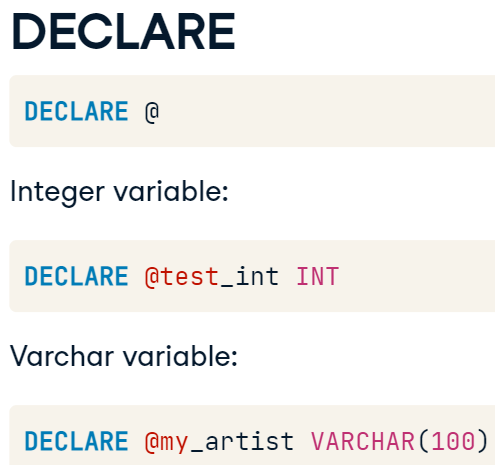

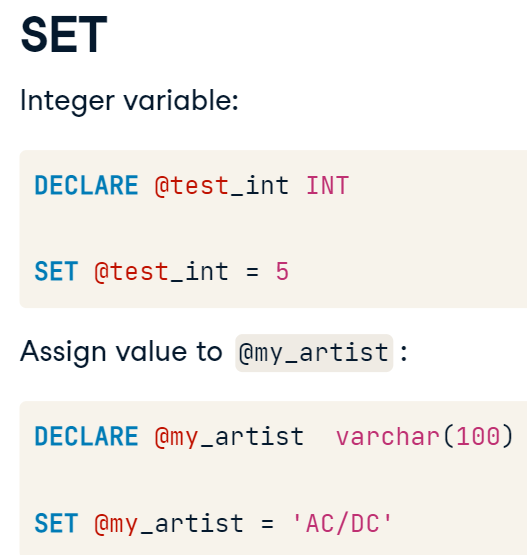

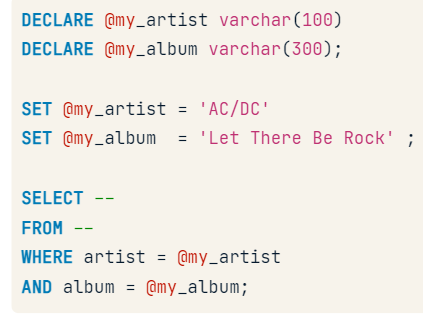

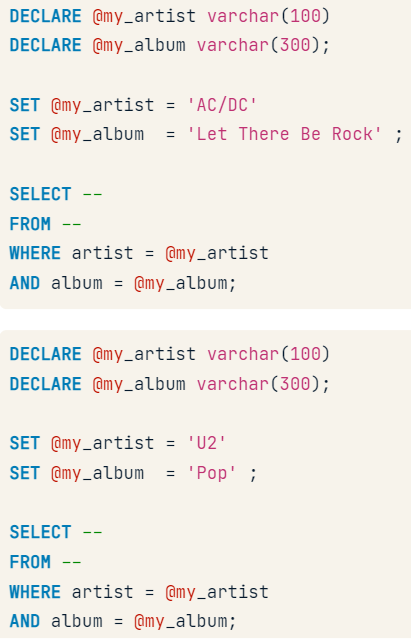

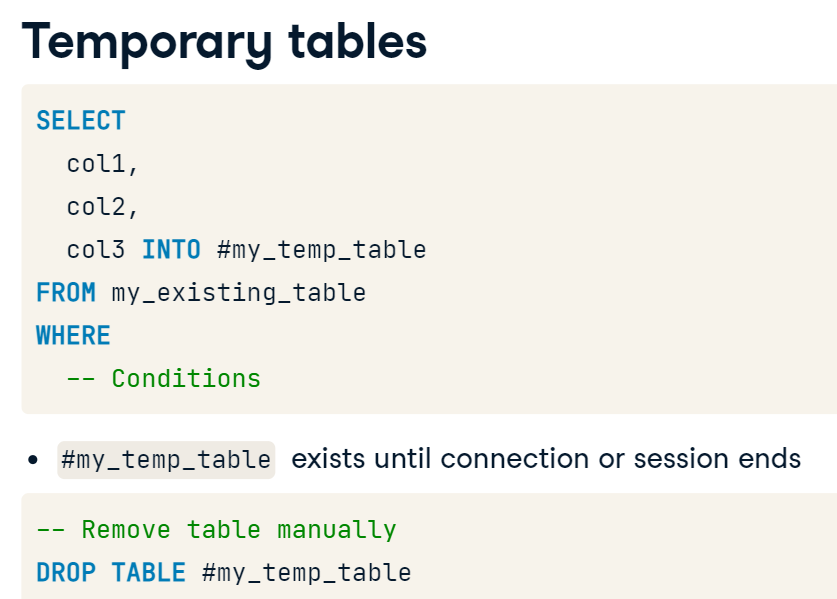

# **DECLARE and SET a variable**

Using variables makes it easy to run a query multiple times, with different values, without having to scroll down and amend the `WHERE` clause each time. You can quickly update the variable at the top of the query instead. 

Let's go back to the now very familiar `grid` table for this exercise, and use it to practice extracting data according to your newly defined variable.

In [38]:
from pathlib import Path
import sqlite3
import pandas as pd

Path('data.db').touch()
conn = sqlite3.connect('data.db')
c = conn.cursor()
c.execute('''CREATE TABLE grid (grid_id int, description text, event_year int, event_date text, restore_date text, nerc_region text, demand_loss_mw float, affected_customers float)''')
# load the data into a Pandas DataFrame
grid = pd.read_csv('grid.csv')
# write the data to a sqlite table
grid.to_sql('grid', conn, if_exists='append', index = False)


* `DECLARE` the variable `@region`, which has a data type of `VARCHAR` and length of `10`.
* SET your newly defined variable to `'RFC'`

```
DECLARE @region VARCHAR(10)
SET @region = 'RFC'
```

SQLite ไม่รองรับการประกาศตัวแปร


# **Declare multiple variables**

You've seen how to `DECLARE` and `SET` set 1 variable. Now, you'll `DECLARE` and `SET` multiple variables. There is already one variable declared, however you need to overwrite this and declare 3 new ones. The `WHERE` clause will also need to be modified to return results between a range of dates.

* Declare a new variable called `@start` of type `DATE` and `SET` `@start` to `'2014-01-24'`.
* Declare a new variable called `@stop` of type `DATE` and `SET` `@stop` to `'2014-07-02'`
* Declare a new variable called` @affected` of type `INT` equals 5,000.

```
DECLARE @start DATE
DECLARE @stop DATE
DECLARE @affected INT

SET @start = '2014-01-24'
SET @stop = '2014-07-02'
SET @affected
```

* Retrieve all rows where `event_date` is `BETWEEN` `@start` and `@stop` and `affected_customers` is greater than or equal to `@affected`.



```
SELECT description,
       nerc_region,
       demand_loss_mw,
       affected_customers
FROM grid
WHERE event_date BETWEEN @start AND @stop
AND affected_customers >= @affected;
```




# **Ultimate Power**

Sometimes you might want to 'save' the results of a query so you can do some more work with the data. You can do that by creating a <ins>*temporary table*</ins> that remains in the database until SQL Server is restarted. In this final exercise, you'll select the longest track from every album and add that into a temporary table which you'll create as part of the query.

* Create a temporary table called `maxtracks`. Make sure the table name starts with `#`.
* Join `album` to `artist` using `artist_id`, and `track` to `album` using `album_id`.
* Run the final `SELECT` statement to retrieve all the columns from your new table.

In [6]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///Chinook.sqlite")

pd.read_sql_query('''SELECT  Album.Title AS album_title,
                             Artist.Name as artist,
                             MAX(Track.Milliseconds / (1000 * 60) % 60 ) AS max_track_length_mins
                     INTO #maxtracks
                     FROM Album
                     INNER JOIN Artist ON Album.ArtistId = Artist.ArtistId
                     INNER JOIN Track ON Album.AlbumId = Track.AlbumId
                     GROUP BY Artist.ArtistId, Album.Title, Artist.Name, Album.AlbumId
                     SELECT album_title, artist, max_track_length_mins
                     FROM  #maxtracks
                     ORDER BY max_track_length_mins DESC, artist;''', con=engine)

,album_title,artist,max_track_length_mins
0,"Battlestar Galactica (Classic), Season 1",Battlestar Galactica (Classic),49
1,"Battlestar Galactica, Season 3",Battlestar Galactica,47
2,"Lost, Season 2",Lost,47
3,"Heroes, Season 1",Heroes,44
4,Battlestar Galactica: The Story So Far,Battlestar Galactica,43
...,...,...,...
342,Bach: The Cello Suites,Yo-Yo Ma,2
343,Monteverdi: L'Orfeo,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",1
344,SCRIABIN: Vers la flamme,Christopher O'Riley,1
345,"Charpentier: Divertissements, Airs & Concerts",Les Arts Florissants & William Christie,1


* SQLite doesn't support `INTO #table` as temporary tables.

### Remember, temporary tables are removed when your SQL Server session ends, or you can remove them with the `DROP TABLE` command.